In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

In [ ]:
#add first convolution layer with the input shape
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(150, 150, 3)))
#add a Maxpooling layer
model.add(MaxPooling2D((2, 2)))
#add another convolution layer with more hidden units
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))
#add another convolution layer with more hidden units
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [37]:
# create data generators
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it=train_datagen.flow_from_directory('/content/drive/MyDrive/cats and dogs/cd_train',class_mode='binary', batch_size=64, target_size=(150, 150))
test_it=test_datagen.flow_from_directory('/content/drive/MyDrive/cats and dogs/cd_test',class_mode='binary', batch_size=64, target_size=(150, 150))

Found 427 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
4/4 [==============================] - 24s 7s/step - loss: 3.1472 - accuracy: 0.4567 - val_loss: 0.7046 - val_accuracy: 0.4712
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6940 - accuracy: 0.4952 - val_loss: 0.6847 - val_accuracy: 0.5288
Epoch 3/20
4/4 [==============================] - 14s 3s/step - loss: 0.6891 - accuracy: 0.5625 - val_loss: 0.6820 - val_accuracy: 0.5288
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.6816 - accuracy: 0.5385 - val_loss: 0.6778 - val_accuracy: 0.5433
Epoch 5/20
4/4 [==============================] - 14s 3s/step - loss: 0.6827 - accuracy: 0.5817 - val_loss: 0.6735 - val_accuracy: 0.5577
Epoch 6/20
4/4 [==============================] - 14s 3s/step - loss: 0.6756 - accuracy: 0.5673 - val_loss: 0.6837 - val_accuracy: 0.5288
Epoch 7/20
4/4 [==============================] - 14s 3s/step - loss: 0.6928 - accuracy: 0.4904 - val_loss: 0.6730 - val_accuracy: 0.5337
Epoch 8/20
4/4 [==================

In [ ]:
model.save('cats-vs-dogs.h5')

In [ ]:
_,acc=model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


> 65.865


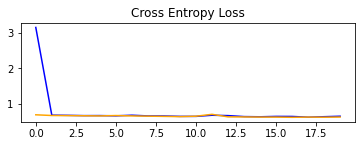

In [ ]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

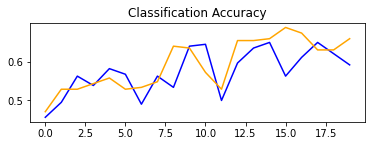

In [ ]:
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
import sys
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.close()

In [43]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cat.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

FileNotFoundError: ignored